# Exercise 08: Model Evaluation

Welcome to the eighth exercise for Applied Machine Learning.

Your objectives for this session are to:

- implement several different machine learning models for comparison,
- evaluate regression models with different loss functions and basic error analysis, and
- evaluate classification models with classification reports, ROC/AUC, and gains charts.

First let's import the libraries for today.

In [1]:
# for data handling
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt 

# for making a train-tes split
from sklearn.model_selection import train_test_split

# sklearn functions for evaluating regressors
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, max_error, root_mean_squared_error, PredictionErrorDisplay 

# sklearn functions for evaluating classifiers
from sklearn.metrics import classification_report, RocCurveDisplay

# dummy models for baseline
from sklearn.dummy import DummyRegressor, DummyClassifier

# regression and classification models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In addition to the familiar libraries imported above, we'll use two new libraries in this notebook: 
* `imbalanced-learn`, for handling imbalanced data in classification tasks.
* `scikit-plot`, for easier plotting of things like confusion matrices, calibration curves, and gains charts.

If you haven't installed these packages in the past, uncomment the code in the next blocks and run the installation commands.

In [ ]:
# !pip install imbalanced-learn

In [ ]:
# ! pip install -U mljar-scikit-plot

Once installed, import `scikit-plot` and the `SMOTE` function from `imbalanced-learn`.

In [4]:
import scikitplot as skplt
from imblearn.over_sampling import SMOTE 

____

### Part 1: Regression models

In Exercise 04 and 05 you built several regression models to predict home prices with the `HomesSoldHellerup.csv` dataset. We continue with that data here. 

Begin by reading the `HomesSoldHellerup.csv` file, using `pd.read_csv`. 

In [5]:
homes_df = pd.read_csv('HomesSoldHellerup.csv', sep=';')

Let's predict `price` with the following attributes: `m2`, `Build Year`, `Type of Sale`, `Type`.

# <font color='red'>TASK 1</font>

Define your feature matrix `X` and target variable `y`. (*Hint: some of the attributes are categorical so you need to make dummy variables. If you don't remember how, try looking back at Exercises 04 and 05.*)

In [6]:
# your code here - define X and y
X = pd.get_dummies(homes_df.drop(columns=['Price']))
y = homes_df['Price']


Use the following code to make a train-test split.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Building a baseline regressor

# <font color='red'>TASK 2</font>

Define a [dummy regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) as `dm` and fit it to the training data. 

In [8]:
# your code here - define dm and fit to training data
dm = DummyRegressor(strategy='mean')
dm.fit(X_train, y_train)

,strategy,'mean'
,constant,None
,quantile,None


Use the code below to predict `y` (home price) for your test set with the dummy regressor.

In [9]:
dm_y_pred = dm.predict(X_test)

Use the code below to inspect the dummy regressor's R-squared (score) on the training and test sets.

In [108]:
print("Score on training set: {:.3f}".format(dm.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(dm.score(X_test, y_test)))

Score on training set: 0.000
Score on test set: -0.002


How do you interpret these scores? What's the dummy regressor actually doing?

# <font color='red'>TASK 3</font>

### Building candidate regressors

Define a [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) as `lr` and fit it to the training data. Then predict `y` (home price) for your test set with the linear regression model. Define the predictions as an object called `lr_y_pred`.

In [ ]:
# your code here - define lr and fit to training data, then predict y for the test set and save predictions as lr_y_pred
lr = LinearRegression()
lr_y_pred = lr.fit(X_train, y_train).predict(X_test)

Inspect the training and test scores for the linear regression model.

In [ ]:
print("Score on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(lr.score(X_test, y_test)))

Score on training set: 0.966
Score on test set: 0.290


Define a [k-nearest neighbor regressor model](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) as `kn` and fit it to the training data. Then predict `y` (home price) for your test set with the KNN regressor model. Define the predictions as an object called `kn_y_pred`.

In [111]:
# your code here - define kn and fit to training data, then predict y for the test set and save predictions as kn_y_pred
kn = KNeighborsRegressor(n_neighbors=5)
kn_y_pred = kn.fit(X_train, y_train).predict(X_test)

Inspect the training and test scores for the KNN regressor model.

In [112]:
print("Score on training set: {:.3f}".format(kn.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(kn.score(X_test, y_test)))

Score on training set: 0.717
Score on test set: 0.468


Define a [random forest regressor model](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random+forest+regressor#) as `rf` and fit it to the training data. 

Set the following hyperparameters: `n_estimators=500` and `max_depth=5`... do you know what they mean?

In [113]:
# your code here - define rf and fit to training data
rf = RandomForestRegressor(n_estimators=500, max_depth=5)
rf.fit(X_train, y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Predict `y` (home price) for your test set with the random forest regressor model. Define the predictions as an object called `rf_y_pred`.

In [114]:
# your code here - predict y for the test set and save predictions as rf_y_pred
rf_y_pred = rf.predict(X_test)

Inspect the training and test scores for the random forest regressor model.

In [115]:
print("Score on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(rf.score(X_test, y_test)))

Score on training set: 0.778
Score on test set: 0.628


### Evaluating your regressors

Now you've fit several models: a dummy regressor as a baseline, a multiple linear regression, a KNN regressor, and a random forest regressor. Looking at the R-squared value for the training and test sets above already gives us a sense of each model's performance. But in general, what we usually care about most is not how much variance a regression model captures, as recorded with R-squared, but rather how far off predicted values are from actual, true values. So let's check out some different loss functions that we could use to communicate the predictive performace of regression models: mean absolute error (MAE), mean absolute percentage error (MAPE), mean squared error (MSE), and root mean squared error (RMSE). 

Use the code below to calculate MAE, MAPE, MSE, and RMSE for each regressor and then display the results in a table. Try to understand what's happening line-by-line.

In [116]:
# this is a function that takes actual y values (y_true) and predicted y values (y_pred) and calculates MAE, MAPE, MSE, and RMSE
def get_metrics(y_true, y_pred):
    
    # MAE: the average of the absolute differences between the actual values and the predicted values
    mae = mean_absolute_error(y_true, y_pred)
    
    # MAPE: the average absolute percentage difference between the actual and predicted values
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    # MSE: the average of the squared differences between the actual values and the predicted values
    mse = mean_squared_error(y_true, y_pred)
    
    # RMSE: the square root of MSE
    rmse = mean_squared_error(y_true, y_pred)

    # Max error: the average absolute percentage difference between the actual and predicted values
    max = max_error(y_true, y_pred)
    
    # return all four metrics
    return mae, mape, mse, rmse, max


In [117]:
# calculate the metrics for each model using our `get_metrics` function.
dm_metrics = get_metrics(y_test, dm_y_pred)  # for dummy regressor
lr_metrics = get_metrics(y_test, lr_y_pred)  # for linear regression
kn_metrics = get_metrics(y_test, kn_y_pred)  # for KNN regressor
rf_metrics = get_metrics(y_test, rf_y_pred)  # for random forest regressor


In [118]:

# create a dataframe (table) to store and display the computed metrics where each row represents a different model and each column represents a different metric
results = pd.DataFrame({
    'Model': ['Dummy', 'Linear Regression', 'KNN', 'Random Forest'],  # model names
    'MAE': [dm_metrics[0], lr_metrics[0], kn_metrics[0], rf_metrics[0]],  # MAE values for each model
    'MAPE': [dm_metrics[1], lr_metrics[1], kn_metrics[1], rf_metrics[1]],  # MAPE values for each model
    'MSE': [dm_metrics[2], lr_metrics[2], kn_metrics[2], rf_metrics[2]],  # MSE values for each model
    'RMSE': [dm_metrics[3], lr_metrics[3], kn_metrics[3], rf_metrics[3]], # RMSE values for each model
    'Max': [dm_metrics[4], lr_metrics[4], kn_metrics[4], rf_metrics[4]] # Max error values for each model

})

# display results
results

,Model,MAE,MAPE,MSE,RMSE,Max
0,Dummy,3.093924e+06,1.334993,2.130772e+13,2.130772e+13,3.063700e+07
1,Linear Regression,2.799854e+06,1.094845,1.510263e+13,1.510263e+13,2.089003e+07
2,KNN,1.679149e+06,0.745986,1.131335e+13,1.131335e+13,2.553090e+07
3,Random Forest,1.514482e+06,0.714202,7.906651e+12,7.906651e+12,2.513182e+07


We can see that the random forest regressor is the best performing candidate model based on all metrics, but now we can clearly see that the random forest would stil be very bad in practice. For instance, looking at MAE, we see that, on average, the prices predicted by the random forest are DKK 1,535,740 off from the actual prices. Looking at MAPE, we see that, on average, the prices predicted by the random forest deviate from the actual prices by about 67.76%. If the actual price of a house is 1,000,000 DKK, the model's predicted price could be off by around 677,648 DKK on average (67.76% of 1,000,000 DKK). Looking at max error, we see that for at least one instance, the random forest predicts a price that is off by 24,743,130 DKK (!!!).

Metrics like MAE, MAPE, MSE, and RMSE are good for getting an overall sense of a regression model's predictive performance. But, as aggregate metrics, they say nothing about the types of errors a model makes. For instance, are our models over- or under-estimating house prices? This is important to consider, because in some contexts, over- and under-estimations have different real-world costs. 

For example, let's say that our model is intended to be used by house sellers: they should use our model and list the house on the market for the price the model predicts. If the model over-estimates the price and the seller lists the house for too high of price, the house sitting on the market longer. Maybe that's not so bad in the long run, assuming that the home is eventually sold after some negotiation. But ift he model under-estimates the price and the seller lists the house for too low of price, the seller might lose hundreds of thousands of DKK because the "good deal" they think they're getting is actually a bad deal based on market conditions.

So, to get a sense of the kinds of errors a model is making, it's good practice to do some kind of [error analysis](https://mindfulmodeler.substack.com/p/a-simple-recipe-for-model-error-analysis). Error analysis is useful for both regression and classification models, and simply entails inspecting the instances for which a model makes erroneous predictions. 


# <font color='red'>TASK 5</font>

Use the `PredictionErrorDisplay` function from `sklearn` to visualize the prediction errors made by the random forest model (*Hint: you should have already defined the true y values as `y_test` and the predicted y values as `rf_y_pred`*).

What can you learn from this visualization? Is the random forest model more accurate for some kinds of houses than others? Does it tend to over-estimate or under-estimate more? Are there any extraordinary prediction errors?

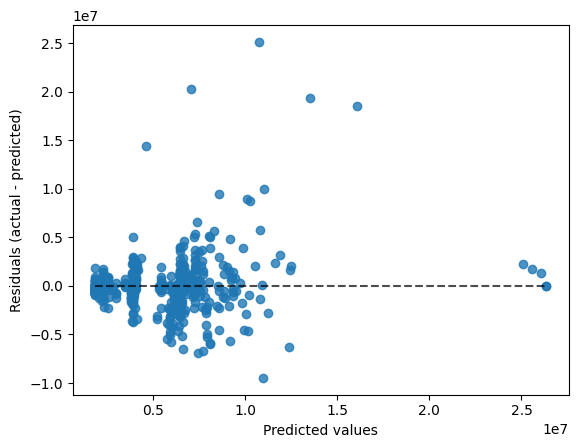

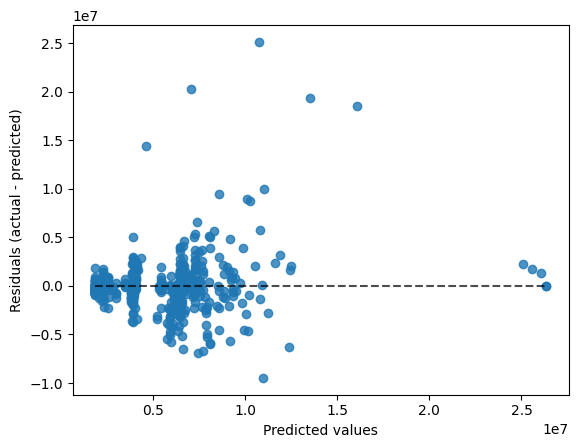

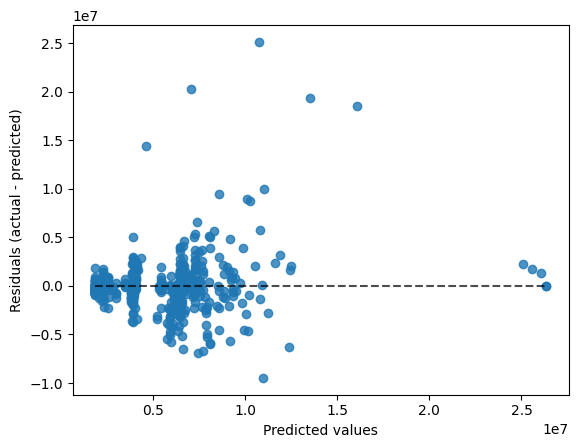

In [119]:
# your code here
display = PredictionErrorDisplay.from_predictions(y_test, rf_y_pred)
display.plot()

____

### Part 2: Classification models

In Exercise 03 you used decision trees to predict whether or not a patient was likely to have a stroke with a sample from the `brain_stroke.csv` dataset. We continue with that data here, but this time using the entire dataset: `brain_stroke_full.csv`. 

# <font color='red'>TASK 5</font>

Begin by reading the `brain_stroke_full.csv` file, and then define your feature matrix `X` and target variable `y`. 

Let's predict `stroke` with the following attributes: `gender`, `age`, `hypertension`, `heart_disease`, `avg_glucose_level`, `bmi`, `smoking_status`.

(*Hint: some of the attributes are categorical.*)

In [120]:
# your code here - read in data, then define X and y
hearts_df = pd.read_csv('brain_stroke_full.csv')
X = pd.get_dummies(hearts_df[["gender", "age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "smoking_status"]], drop_first=True)
y = hearts_df['stroke']

Use the following code to make a train-test split. Note that we specify `stratify=y`, which ensures that the class label distribution in the full dataset is preserved in the training and test sets.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#### Building a baseline classifier

# <font color='red'>TASK 6</font>

Define a [dummy classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html?highlight=dummy+classifier#) as `dm`, fit it to the training data, and predict `y` (the binary class label for `stroke`) for your test set. Define the predictions as an object called `dm_y_pred`.

In [122]:
# your code here - define dm, fit to training data, then predict y for the test set and save predictions as dm_y_pred
dm = DummyClassifier()
dm.fit(X_train, y_train)
dm_y_pred = dm.predict(X_test)

Print the accuracy of the dummy classifier on the training and test data.

In [123]:
print("Accuracy on training set: {:.3f}".format(dm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dm.score(X_test, y_test)))

Accuracy on training set: 0.950
Accuracy on test set: 0.950


Whoa! The dummy classifier is super accurate. Why is that the case? What exactly is the dummy classifier doing?

Let's check the balance of our data.

In [124]:
sum(y)/len(y)

0.049789198956032926

Looks like our data is quite imbalanced. Only about 5% of the instances are instances of stroke (i.e., where `y=1`). This means that even a dummy classifier that always predicts no stroke (i.e., `y=0`) displays high accuracy. 

Let's inspect a confusion matrix...

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

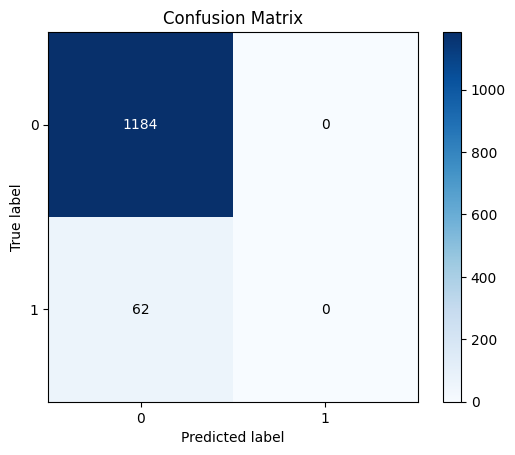

In [125]:
skplt.metrics.plot_confusion_matrix(y_test, dm_y_pred)

The dummy classifier is indeed just predicting `y=0` (`no stroke`) every time and getting 95% accuracy. 

The imbalance in the dataset means "accuracy" is not a good, informative indicator of classifier performance. Despite being about 95% accurate, the classifier is incorrectly classifying all cases of `stroke` as `no stroke`. That's bad! 

#### Dealing with imbalanced data

There are different approaches to dealing with an imbalanced dataset. In some cases, the best thing to do may be to [*do nothing*](https://mindfulmodeler.substack.com/p/imbalanced-data-do-nothing-should). But when the costs of different errors, false positives vs. false negatives, are not equal, then you'll likely need to do something. In our case, it seems like it'd be worse to misclassify a case of `stroke` as `no stroke` (i.e., a false negative — the patient might not get extra care and end up dying), as opposed to misclassifying a case of `no stroke` as `stroke` (i.e., a false positive — the patient might get extra care that they didn't end up needing).



**Class weights**

With many scikit-learn models, like [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), and [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), there is a `class_weight` hyperparameter you can set to tell your model to weigh some class label more than others. 

For example, in our dataset, it's probably more important to catch positive cases where `y=1` (`stroke`) as opposed to negative cases where `y=0` (`no stroke`). So, for example, we could set `class_weight = "balanced"` in a logistic regression classifier to weigh the importance of positive cases as inversely proportional to class frequencies in the input data. This means that when fitting the logistic regression to the data, the optimization process will penalize errors in classifying the positive class more than it penalizes errors in classifying the negative class.

But for some models, like [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), there is no `class_weight` hyperparameter since there is no model training or fitting per se.


**Resampling**

An alternative way to deal with imbalanced data to to apply a resampling technique. 

If you have a big dataset, you can *undersample* the majority class. The most straightforward way to do this is where, instead of using all the available training data, you use all instances with the minority class label and an equal amount of instances with the majority class label. For example, if we have 20,000 instances in our training set with 1,000 instances of `stroke` and 19,000 instances of `no stroke`, we'd just use 2,000 instances to train the model — the 1,000 instances of `stroke` and a random sample of 1,000 instances of `no stroke`.

If you don't have much training data to begin with, undersampling is probably not a good idea. Instead, you could consider *oversampling* the minority class. The most straightforward way to do this entails randomly copying instances from the minority class until their are equal amounts of the minority and majority class. For example, if we have 20,000 instances in our training set with 1,000 instances of `stroke` and 19,000 instances of `no stroke`, we'd randomly copy instances of `stroke` until we have 19,000 and then train the model on 38,000 instances — the 19,000 oversampled instances of `stroke` and the original 19,000 instances of `no stroke`. Oversampling is useful in that it makes algorithms more sensitive to the minority class, but it can also lead to overfitting, since it introduces duplicate instances into the training set.

Here, we'll implement a special kind of oversampling known as the Synthetic Minority Over-sampling Technique (SMOTE). In brief, SMOTE generates new, "synthetic" instances that are similiar to instances with the minority class label. In our case, it will make synthetic stroke patients (i.e., instances with `y=1`). Check out the paper introducing SMOTE [here](https://www.jair.org/index.php/jair/article/view/10302/24590), and the relevant library documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#). Also be aware that SMOTE isn't appropriate for every use case (see this paper [here](https://academic.oup.com/jamia/article/29/9/1525/6605096), which shows that SMOTE, undersampling, and oversampling can lead to miscalibrated probability estimates).

Use the code below to implement SMOTE on the original, imbalanced stroke data. 

In [126]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Now check the balance of class labels in our training set.

In [127]:
sum(y_train_res)/len(y_train_res)

0.5

#### Building candidate classifiers

# <font color='red'>TASK 7</font>

With our balanced training set, now implement a logistic regression, a KNN classifier, and a random forest classifier. 

For each model you should
1. define the model,
2. fit the model to the training data,
3. use the model to predict class labels for the test data, and
4. print the accuracy on the training and test data.

In [136]:
# your code here - implement a logistic regression here (hint: set max_iter=1000)
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train_res, y_train_res)
logr_y_pred = logr.predict(X_test)
print("Accuracy on training set: {:.3f}".format(logr.score(X_train_res, y_train_res)))
print("Accuracy on test set: {:.3f}".format(logr.score(X_test, y_test)))


Accuracy on training set: 0.841
Accuracy on test set: 0.810


In [137]:
# your code here - implement a KNN classifier here
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train_res, y_train_res)
kn_y_pred = kn.predict(X_test)
print("Accuracy on training set: {:.3f}".format(kn.score(X_train_res, y_train_res)))
print("Accuracy on test set: {:.3f}".format(kn.score(X_test, y_test)))

Accuracy on training set: 0.928
Accuracy on test set: 0.807


In [138]:
# your code here - implement a random forest classifier here (set max depth to 10)
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train_res, y_train_res)
rf_y_pred = rf.predict(X_test)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train_res, y_train_res)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.947
Accuracy on test set: 0.876


How are your classifiers looking? Pretty accurate, right?

But as we know, "accuracy" is only part of the classification story. After all, we could get an even higher accuracy with a dummy classifier on the original imbalanced data. Let's now look at measures like precision and recall to get a better sense of our classifiers' performance.

#### Evaluating your classifiers

# <font color='red'>TASK 8</font>

Use the [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to evaluate each of your candidate classifiers.

In [139]:
# print the logistic regression classification report here
print(classification_report(y_test, logr_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1184
           1       0.12      0.45      0.19        62

    accuracy                           0.81      1246
   macro avg       0.54      0.64      0.54      1246
weighted avg       0.92      0.81      0.86      1246



In [140]:
# print the KNN classification report here
print(classification_report(y_test, kn_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1184
           1       0.11      0.42      0.18        62

    accuracy                           0.81      1246
   macro avg       0.54      0.62      0.53      1246
weighted avg       0.92      0.81      0.86      1246



In [141]:
# print the random forest classification report here
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1184
           1       0.18      0.40      0.25        62

    accuracy                           0.88      1246
   macro avg       0.57      0.65      0.59      1246
weighted avg       0.93      0.88      0.90      1246



Inspect the classification reports with a classmate. What can you learn from them? Of these classifiers, which would you most likely recommend in practice? 

Remember, we're predicting strokes. So it might be more important to avoid false negatives (incorrectly predicting that a patient *won't* have a stroke when they actually *will*) than false positives (incorrectly predicting that a patient *will* have a stroke when they actually *won't*).

I would look for the one with the highest recall, as that means that all/most instances which are positive are detected as positive.

In addition to metrics like precision, recall, and F1 shown in the classification reports above, a widely used tool for evaluating classifier performance is ROC/AUC. Use the code below to visualize the ROC/AUC for each candidate classifier.

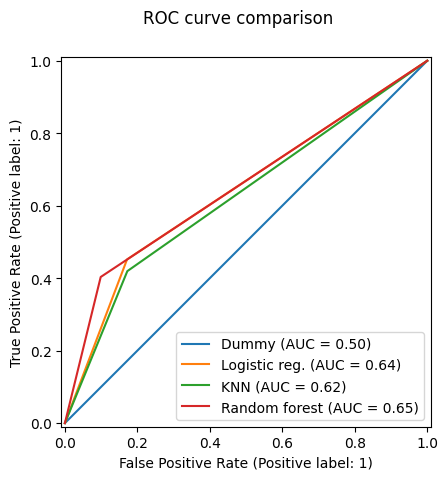

In [142]:
dm_disp = RocCurveDisplay.from_predictions(y_test, dm_y_pred, name = "Dummy")
logr_disp = RocCurveDisplay.from_predictions(y_test, logr_y_pred, ax=dm_disp.ax_, name = "Logistic reg.")
kn_disp = RocCurveDisplay.from_predictions(y_test, kn_y_pred, ax=dm_disp.ax_, name = "KNN")
rf_disp = RocCurveDisplay.from_predictions(y_test, rf_y_pred, ax=dm_disp.ax_, name = "Random forest")

dm_disp.figure_.suptitle("ROC curve comparison")

plt.show()

# <font color='red'>TASK 9</font>

Inspect the ROC/AUC plot above with a classmate. Based on this evaluation, which classifier seems to be the best performer? Do the AUC values suggest that and of the models are good classifiers? 

Random forrest is still the best, though it is not remarkeble.

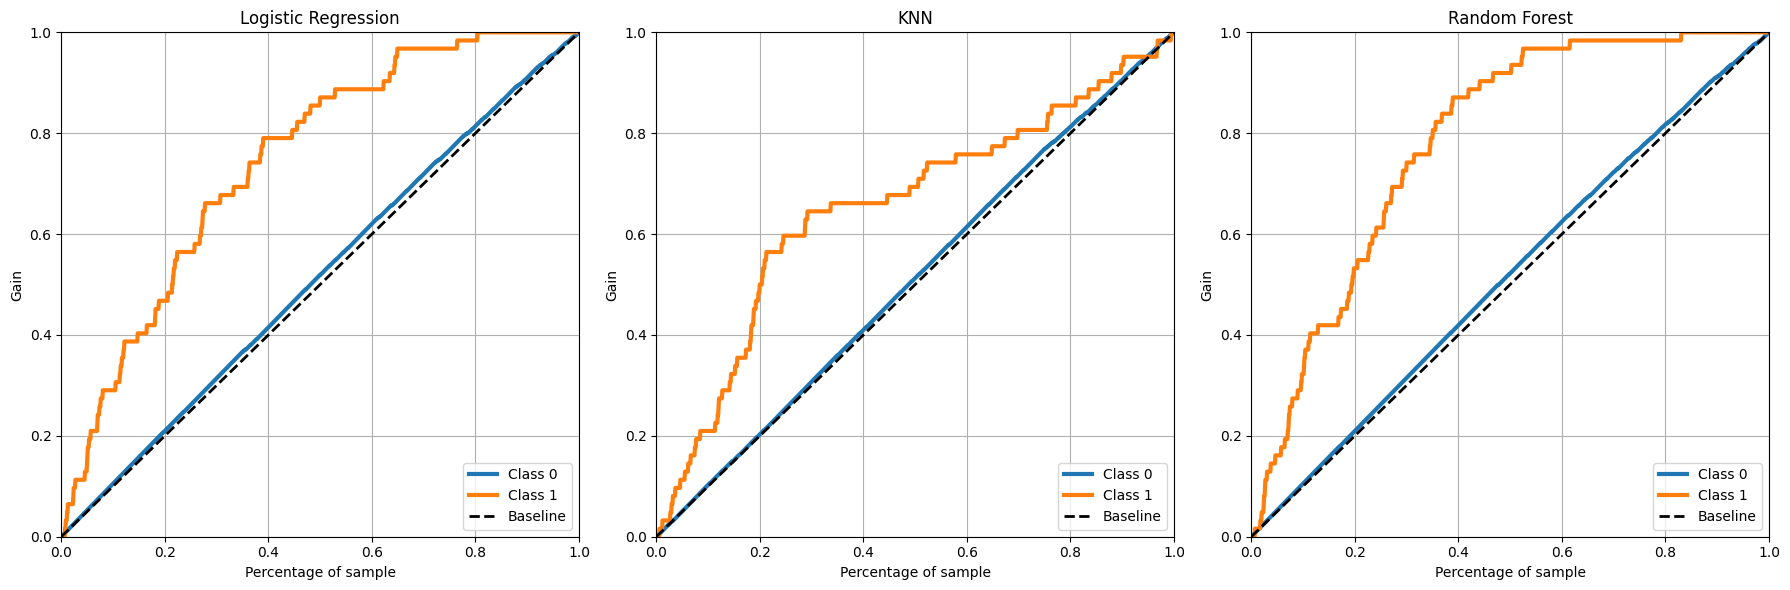

In [143]:
logr_y_probs = logr.predict_proba(X_test)
kn_y_probs = kn.predict_proba(X_test)
rf_y_probs = rf.predict_proba(X_test)

# Create a figure with three subplots arranged in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot cumulative gain for Logistic Regression in the first subplot
skplt.metrics.plot_cumulative_gain(y_test, logr_y_probs, ax=axes[0])
axes[0].set_title("Logistic Regression")

# Plot cumulative gain for K-Nearest Neighbors in the second subplot
skplt.metrics.plot_cumulative_gain(y_test, kn_y_probs, ax=axes[1])
axes[1].set_title("KNN")

# Plot cumulative gain for Random Forest in the third subplot
skplt.metrics.plot_cumulative_gain(y_test, rf_y_probs, ax=axes[2])
axes[2].set_title("Random Forest")

# Display the plots
plt.tight_layout()
plt.show()

# <font color='red'>TASK 10</font>

Inspect the cumulative gains curves visualized above with a classmate. Based on this evaluation, which classifier seems to be the best performer? How does this evaluation compare with what you've already learned from the classification reports and ROC/AUC? 

------

**That's it for this week!** 

**But remember these technical evaluations of ML models don't tell us everything we need to know. Not only are there many more evaluation metrics not covered in this notebook, but there are also important social and ethical considerations to be made for a meaningful model evaluation.**